# Libraries

In [2]:
import os 
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2



import imutils
from imutils.perspective import four_point_transform
from imutils import contours
sns.set()

# HQ Digital Reading

In [307]:
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
    (1, 1, 1, 0, 1, 1, 1): 0,
    (0, 1, 0, 0, 1, 0, 0): 1,
    (1, 0, 1, 1, 1, 1, 0): 2,
    (1, 0, 1, 1, 1, 0, 1): 2,
    (1, 0, 1, 1, 0, 1, 1): 3,
    (0, 1, 1, 1, 0, 1, 0): 4,
    (1, 1, 0, 1, 0, 1, 1): 5,
    (1, 1, 0, 1, 1, 1, 1): 6,
    (1, 0, 1, 0, 0, 1, 0): 7,
    (1, 1, 1, 1, 1, 1, 1): 8,
    (1, 1, 1, 1, 0, 1, 1): 9,
}

In [28]:
data_path = os.getcwd() + str('\\Dataset\\') #check adress if not working /Dataset/
df = pd.DataFrame()

for file in glob.glob(data_path + '*.csv'):
    head, tail = os.path.split(file)
    file_name = tail
    current = pd.read_csv(file, sep = ";")
    current["name"] = file_name
    df = pd.concat([df, current],axis=0)

df = df.drop(df.columns[[0]], axis=1)
df.head()

,used_liter,image,name
0,232,0219dd3cb0c76d33a53bb1f4585565adef4a13f8.jpg,HQ_analog.csv
1,239,04186f57acff48a961a7f50e3eff63012954e958.jpg,HQ_analog.csv
2,10496,1b4627a6b5e2df9aac7f00c4fadd4a312ebefb38.jpg,HQ_analog.csv
3,24,02249cd7cfb602f20e03f3a4e87455737e818f63.jpg,HQ_analog.csv
4,1298,0a0f34d1705019f3c46b7a2f480a7668ab785005.jpg,HQ_analog.csv


In [38]:
df_digital=df[(df["name"]!='HQ_analog.csv')& (df["name"]!="LQ_analog.csv")][["image","name"]]

In [39]:
df_digital

,image,name
0,e104664ba1792dde641d87cd5d95f1df06786140.jpg,HQ_digital.csv
1,48990b5cbe173868040bd33f06fb1b80c2b4f28a.jpg,HQ_digital.csv
2,9e111802446b62b86aeffe911415ad28227caba7.jpg,HQ_digital.csv
3,f78fe5a461f28bc770a7dd856878bb4a314a9027.jpg,HQ_digital.csv
4,62e96bf40409b3b6fd74065ab0bf3ec44f9d0a61.jpg,HQ_digital.csv
...,...,...
245,1ce0f4e786d44a3ce831e470c5bb9eac4602ad04.jpg,MQ_digital.csv
246,043af7a5763b15b7c281eea6de8474ea7133bc5d.jpg,MQ_digital.csv
247,0c2564bc75fc119ef34281405933d48d9db45ae5.jpg,MQ_digital.csv
248,220fe475a2c39efdf7f716603e1b4f60ba10f672.jpg,MQ_digital.csv


In [40]:
data_path

'C:\\Users\\33652\\Documents\\cours_centrale\\Second_semestre\\Case_study\\Eleven_study_repo\\Eleven_study\\Dataset\\'

In [36]:
df_digital.values[0].tolist()[0]

'e104664ba1792dde641d87cd5d95f1df06786140.jpg'

In [46]:
df_digital.name.values[0]

'HQ_digital.csv'

In [48]:
df_digital.name.values[i].strip('.csv') 

'HQ_digital'

In [350]:
def number_prediction(n_image,number_image_not_working,DIGITS_LOOKUP):
    img=cv2.imread('Dataset'+"\\"+df_digital.name.values[i].strip('.csv') +"\\" +df_digital.values[n_image].tolist()[0])
    #image not working test
    #img = cv2.imread('Dataset\\HQ_digital\\28feeee4d7e52d0ba5d2cee31c8886e57f574319.jpg')
    try:
        image,gray,edged=grayscale(img)  
    except:
        return None
    displayCnt=contours_1(edged)
    if displayCnt is None:
        number_image_not_working=number_image_not_working+1
        return None
    #test_point=cv2.drawContours(image.copy(),displayCnt,-1, (0, 255, 0), 3)
    #plt.imshow(test_point)
    warped,output=extract_display(gray,image,displayCnt)
    img_warped,img_output=blur(warped,output)
    image_resized_warped,image_resized_output,=resized(img_warped,img_output)
    cropped_img_w,cropped_img_o=cropped_im(image_resized_warped,image_resized_output)
    output=cropped_img_o
    th2 = cv2.adaptiveThreshold(cropped_img_w,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,15,3)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
    #Opening is just another name of erosion followed by dilation. It is useful in removing noise. 
    thresh_opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel, iterations = 1)
    #Closing is reverse of Opening, Dilation followed by Erosion. 
    #It is useful in closing small holes inside the foreground objects, or small black points on the object.
    thresh_closing = cv2.morphologyEx(thresh_opening, cv2.MORPH_CLOSE, kernel, iterations = 0)
    dilation = cv2.dilate(thresh_closing, kernel, iterations = 0)
    erode = cv2.erode(thresh_closing, kernel, iterations = 0)
    contours_totaux = create_contours(dilation, cv2.RETR_TREE)
    mask=mask_generate(dilation,contours_totaux)
    thresh_dilate=dilate(mask,kernel)
    new_contours=create_contours(thresh_dilate, cv2.RETR_EXTERNAL)
    
    #plt.imshow(warped)
    
    # sort the contours from left-to-right, then initialize the actual digits themselves
    try:
        digitCnts_f = contours.sort_contours(new_contours, method="left-to-right")[0]
    except:
        return None
    digits = []
    image_contours = cv2.drawContours(output.copy(),digitCnts_f,-1, (0, 255, 0), 3)
    digits=detect_digit(digitCnts_f,thresh_dilate,digits,output) 
    return digits
#run the function 
number_image_not_working=0
for i in range(len(df_digital)):        #len(df_digital) for all
    digit=number_prediction(i,number_image_not_working,DIGITS_LOOKUP)
    print(digit)

[3, 1, 1, 0, 1]
[2, 9, 1, 1, 1, 1]
None
None
[1, 1, 1, 1, 1, 1]
None
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
None
[1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1]
None
None
None
None
None
None
None
None
[1, 7, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
None
[8, 7, 1, 1]
None
None
[2, 9, 1, 1]
None
None
[1, 1, 4, 5, 0, 1]
None
None
None
[1, 1, 1, 1, 1]
None
None
[1, 1, 1, 1, 1, 1]
[1, 1, 1]
[1, 1, 1, 1, 1, 1]
None
None
[4, 5, 1, 1]
None
[1, 1, 1, 1, 1, 1]
None
None
None
None
None
[1, 1, 1, 1]
[0, 1, 1, 1, 1]
[1, 1, 8, 8]
[1, 1]
[1, 1, 1]
[1, 1, 1, 1, 1, 1]
None
None
[1, 1, 1]
[1, 1, 1, 1, 1]
None
None
[1, 1, 1, 1, 1]
[1]
[1, 1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[1]
None
None
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 6, 6, 1]
[1, 1, 1, 1, 1]
[2, 1, 8, 1]
[1, 8, 1, 1, 1]
[7, 2, 1, 1]
[1, 1, 1, 1, 1]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[6, 1, 1, 1]
[1, 1, 6]
None
None
[1, 1, 4, 6, 1, 2, 1]
[1, 2, 1, 5, 0, 1]
[1, 6, 9, 1, 1]
[1]
None
None
[1, 1, 1, 1, 1, 1]
[1, 1]
[1, 1, 1, 1

In [51]:
# load the example image
#image = cv2.imread('Dataset/LQ_digital/1b6948b086f001d12a153572606f78744c006c24.jpg') #not working
#image = cv2.imread('Dataset/HQ_digital/28feeee4d7e52d0ba5d2cee31c8886e57f574319.jpg')
#image = cv2.imread('Dataset/HQ_digital/05e5e706f7654e756c1d4dc0740759f9559ab638.jpg')

In [326]:
# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
def grayscale(image):
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)
    return image,gray,edged

In [292]:
# find contours in the edge map, then sort them by their size in descending order
def contours_1(edged):
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break
    return displayCnt

In [119]:
def extract_display(gray,image,displayCnt):
    # extract the thermostat display, apply a perspective transform to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    return warped, output

In [126]:
def blur(warped,output):
    img_warped = cv2.medianBlur(warped,5)
    img_output = cv2.medianBlur(output,5)
    return img_warped, img_output

In [132]:
def resized(img_warped,img_output):
    image_resized_warped = cv2.resize(img_warped, (400,100))
    image_resized_output = cv2.resize(img_output, (400,100))
    return image_resized_warped,image_resized_output

In [139]:
def cropped_im(image_resized_warped,image_resized_output):
    cropped_img_w = image_resized_warped[0:100, 0:375]
    cropped_img_o = image_resized_output[0:100, 0:375]
    return cropped_img_w,cropped_img_o

In [151]:
def create_contours(image,hierarchy):
    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(image.copy(),hierarchy, cv2.CHAIN_APPROX_SIMPLE)
    #cnts = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # play with the contours : https://docs.opencv.org/3.4/d9/d8b/tutorial_py_contours_hierarchy.html
    cnts = imutils.grab_contours(cnts)
    digitCnts = []
    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
        if (w >= 5 and w <= 80) and (h >= 15 and h <= 170) :
            digitCnts.append(c)   
    return digitCnts

In [157]:
#image_contours = cv2.drawContours(output.copy(), digitCnts, -1, (0, 255, 0), 3)
#image_contours = cv2.drawContours(output.copy(), digitCnts, -1, (0, 255, 0), 3)
def mask_generate(dilation,contours_totaux):
    # Generate mask
    mask = np.ones(dilation.shape,dtype=np.uint8)*0
    #cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    mask = cv2.drawContours(mask, contours_totaux, -1, 255, cv2.FILLED)
    return mask

In [160]:
def dilate(mask,kernel):
    thresh_dilate = cv2.dilate(mask, kernel, iterations = 1)
    thresh_dilate = cv2.dilate(mask, kernel, iterations = 1)
    return thresh_dilate

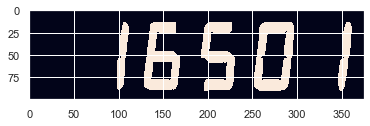

In [156]:
plt.imshow(thresh_dilate)

In [158]:
len(new_contours)

5

In [161]:
#cv2.imshow("Image_contours", image_contours)
#cv2.imshow("Output", output)
#cv2.waitKey(0)

In [349]:
# loop over each of the digits
def detect_digit(digitCnts_f,thresh_dilate,digits,output): 
    for c in digitCnts_f:
        # extract the digit ROI
        (x, y, w, h) = cv2.boundingRect(c)
        #rect=cv2.minAreaRect(c)
        #print(box)
        #x=int(rect[0][0])
        #y=int(rect[0][1])
        #w=int(rect[1][0])
        #h=int(rect[1][1])
        # to handle the one case:
        if(w<30):
            w=25
        #roi = dilation[y:y + h, x:x + w]
        roi = thresh_dilate[y:y + h, x:x + w]
        # compute the width and height of each of the 7 segments we are going to examine
        (roiH, roiW) = roi.shape
        (dW, dH) = (int(roiW * 0.4), int(roiH * 0.15))
        dHC = int(roiH * 0.05)
        # define the set of 7 segments
        segments = [
            ((0, 0), (w, dH)), # top
            ((0, 0), (dW, h // 2)), # top-left
            ((w - dW, 0), (w, h // 2)), # top-right
            ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
            ((0, h // 2), (dW, h)), # bottom-left
            ((w - dW, h // 2), (w, h)), # bottom-right
            ((0, h - dH), (w, h)) # bottom
        ]
        on = [0] * len(segments)
        # loop over the segments

        #box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
        #box = np.int0(box)

        #image_contours_seg = cv2.rectangle(thresh_dilate.copy(), (x, y), (x + w, y + h), (255, 20, 10), 1)
        #cv2.imshow("Output", image_contours_seg)
        #cv2.waitKey(0)
        for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
            # extract the segment ROI, count the total number of
            # thresholded pixels in the segment, and then compute
            # the area of the segment
            segROI = roi[yA:yB, xA:xB]
            total = cv2.countNonZero(segROI)
            area = (xB - xA) * (yB - yA)

            # if the total number of non-zero pixels is greater than 50% of the area, mark the segment as "on"
            try:
                if total / float(area) > 0.5:
                    on[i]= 1
            except:
               on[i]=0
        if(w<30):
            on=[0, 1, 0, 0, 1, 0, 0]
        # lookup the digit and draw it on the image
        try:
            digit = DIGITS_LOOKUP[tuple(on)]
        except:
            digit=1
        digits.append(digit)
        # a decommenter
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(output, str(digit), (x+5, y +5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)
    return digits

In [334]:
cv2.imshow("Output", output)
cv2.waitKey(0)

NameError: name 'output' is not defined

In [ ]:
image_contours = cv2.drawContours(output.copy(), digitCnts_f, -1, (0, 255, 0), 3)

In [ ]:
segments

In [ ]:
digitCnts_f